# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [68]:
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo=pd.read_csv(url,sep="\t")

### Step 4. See the first 10 entries

In [69]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [70]:
#This line are important to me because, i can get the top 5 items bought
top5=chipo.groupby(by="item_name").agg({'quantity':'sum'}).sort_values(by='quantity',ascending=False)[:5]
top5.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [71]:
#now i got the list but ineed to reset the index for plot the list
plot5=top5.reset_index()
plot5.head()


,item_name,quantity
0,Chicken Bowl,761
1,Chicken Burrito,591
2,Chips and Guacamole,506
3,Steak Burrito,386
4,Canned Soft Drink,351


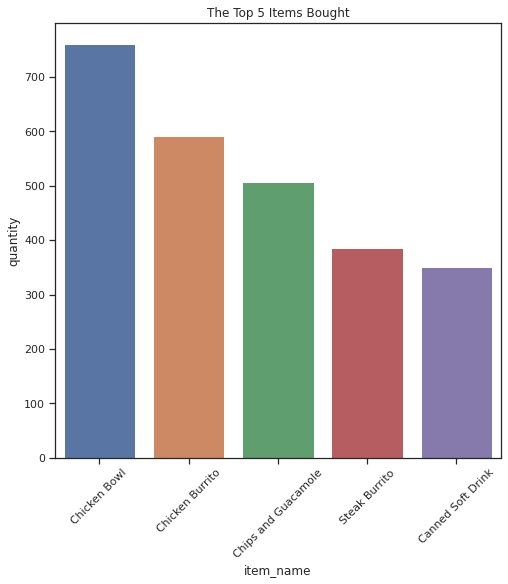

In [72]:
#now I goint to do a beatiful histagram with seaborn
sns.set(style='ticks',palette='deep',font='verdana',font_scale=1)
plt.figure(figsize=(8,8))
sns.barplot(data=plot5,x='item_name',y='quantity')
plt.xticks(rotation=45)
plt.title("The Top 5 Items Bought")
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [73]:
#i will check if everythin is in order and i realize that i need change item_price from object to int64
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [74]:
#whit this senceten i can remove the symbol $
#chipo.item_price.str.slice(1)
#whit tha logic i can change to a number
chipo['item_price']=chipo.item_price.str.slice(1).astype(float)


In [75]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


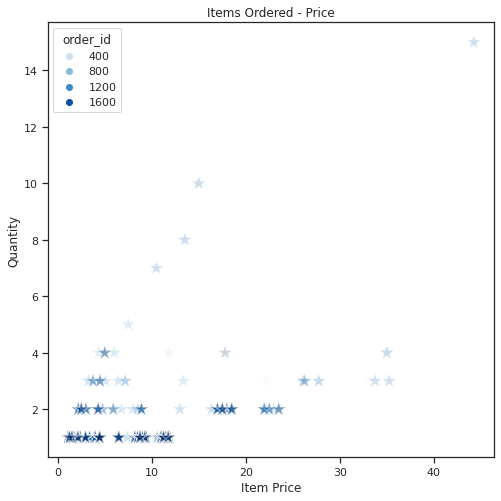

In [76]:
sns.set_style("ticks")
plt.figure(figsize=(8,8))
sns.scatterplot(data=chipo,x='item_price',y='quantity',alpha=0.2,marker='*',s=200,hue='order_id',palette='Blues')
plt.title("Items Ordered - Price")
plt.xlabel('Item Price')
plt.ylabel("Quantity")
plt.minorticks_off()
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.